# ***Q2) Salary_hike -> Build a prediction model for Salary_hike Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python***

In [16]:
# importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
# import dataset
data = pd.read_csv(r'/content/Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# ***EDA And Data Visualization***

In [ ]:
# EDA And Data Visualization
data.info()

In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
# checking null values
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
# Checking for Duplicate Values
data[data.duplicated()].shape

(0, 2)

In [8]:
data[data.duplicated()]

,YearsExperience,Salary


In [9]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salary')

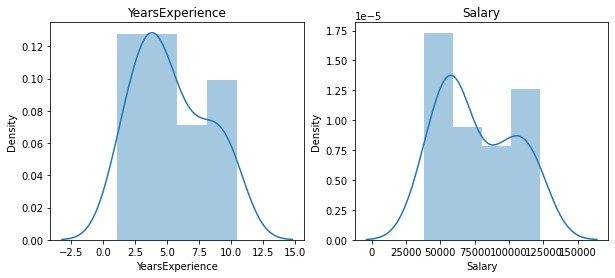

In [10]:
# DISTPLOT
plt.subplots(figsize= (10,4))
plt.subplot(121)
sns.distplot(data['YearsExperience'])
plt.title("YearsExperience")
plt.subplot(122)
sns.distplot(data['Salary'])
plt.title("Salary")

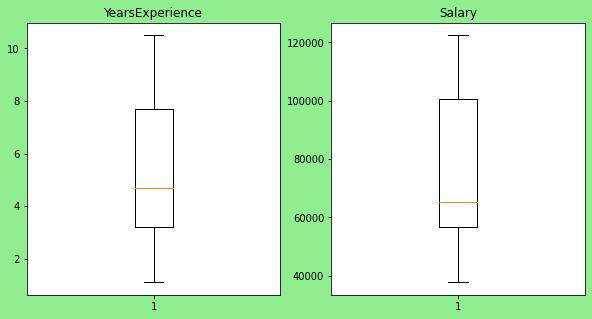

In [11]:
# Plotting the data to check for outliers
plt.subplots(figsize = (10,5), facecolor="lightgreen")
plt.subplot(121)
plt.boxplot(data['YearsExperience'])
plt.title('YearsExperience')
plt.subplot(122)
plt.boxplot(data['Salary'])
plt.title('Salary')
plt.show()

In [12]:
# Correlation Analysis
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


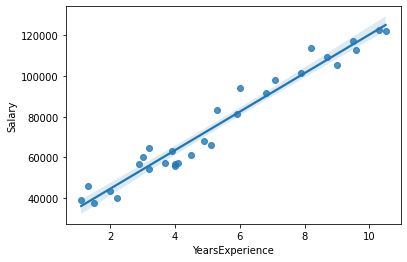

In [13]:
# Visualization of Correlation beteen x and y
sns.regplot(x= data["YearsExperience"], y= data["Salary"])

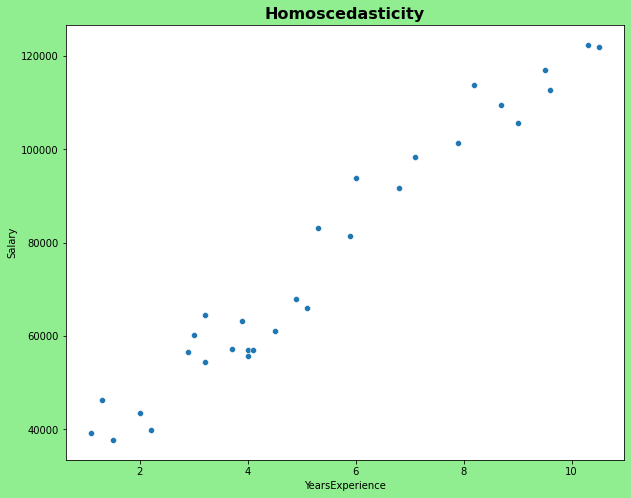

In [14]:
plt.figure(figsize = (10,8), facecolor = 'lightgreen')
sns.scatterplot(x = data['YearsExperience'], y = data['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

# ***Model Building***

In [18]:
model=smf.ols("Salary~YearsExperience",data=data).fit()
model

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           1.14e-20
Time:                        16:10:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ***Model Testing***

In [20]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [21]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [22]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

# ***Model Predictions***

In [23]:
# Manual prediction for say 5 Years Experience
Salary = (25792.200199) + (9449.962321)*(5)
Salary

73042.01180400001

In [24]:
# Automatic Prediction for say 5 & 7 Years Experience 
new_data=pd.Series([5,7])
new_data

0    5
1    7
dtype: int64

In [28]:
data_predicted=pd.DataFrame(new_data,columns=['YearsExperience'])
data_predicted

,YearsExperience
0,5
1,7


In [29]:
model.predict(data_predicted)

0    73042.011806
1    91941.936449
dtype: float64